In [ ]:
pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.8 MB/s eta 0:00:00


In [ ]:
!pip install librosa

In [ ]:
pip install torchaudio

In [ ]:
!pip install soundfile

In [ ]:
import os
import torchaudio
import pandas as pd


In [ ]:

audio_dir = './data'


In [ ]:
audio_id = []
language = []
audio = []
raw_text = []
normalized_text = []
gender = []
speaker_id = []
is_gold_transcript = []
accent = []




for filename in os.listdir(audio_dir):
    if filename.endswith('.wav'):  # Adjust the file extension if needed
        audio_path = os.path.join(audio_dir, filename)
        raw_text1 = "hi, " + os.path.splitext(filename)[0]  # Implement a function to extract the text from the filename or any other source
        #print(filename)
        language1 = 1   # Provide the language value
        normalized_text1 = "hi, " + os.path.splitext(filename)[0]  # Implement a function to normalize the transcribed text
        normalized_text1 = normalized_text1.replace("-"," ")
        print(normalized_text1)
        gender1 = 'female'  # Provide the gender value
        speaker_id1 = 1  # Implement a function to obtain the speaker ID
        is_gold_transcript1 = False  # Provide the value indicating if the transcript is gold
        accent1 = 'eng-in'  # Provide the accent value
        audio_id.append(filename)
        language.append(language1)
        #audio.append(waveform)
        #print(waveform.numpy())
        raw_text.append(raw_text1)
        normalized_text.append(normalized_text1)
        gender.append(gender1)
        speaker_id.append(speaker_id1)
        is_gold_transcript.append(is_gold_transcript1)
        accent.append(accent1)
        audio.append({
        #     'audio_id': filename,
        #     'language': language,
              'path': audio_path,
              #'array':waveform.numpy(),
              'sampling_rate':16000
        #     'raw_text': raw_text,
        #     'normalized_text': normalized_text,
        #     'gender': gender,
        #     'speaker_id': speaker_id,
        #     'is_gold_transcript': is_gold_transcript,
        #     'accent': accent
          })


In [ ]:
data = {
    'audio_id': audio_id,
    'language': language,
    'audio': audio,
    'raw_text': raw_text,
    'normalized_text': normalized_text,
    'gender': gender,
    'speaker_id': speaker_id,
    'is_gold_transcript': is_gold_transcript,
    'accent': accent
}


In [ ]:
from datasets import Dataset,Audio

In [ ]:
dataset1 = Dataset.from_dict(data)

In [ ]:
dataset1

Dataset({
    features: ['audio_id', 'language', 'audio', 'raw_text', 'normalized_text', 'gender', 'speaker_id', 'is_gold_transcript', 'accent'],
    num_rows: 16441
})

In [ ]:
type(dataset1)

datasets.arrow_dataset.Dataset

In [ ]:
dataset1 = dataset1.cast_column('audio', Audio(sampling_rate=16000))

In [ ]:
dataset1[1]['normalized_text']

'hi, bhavya'

## Install required packages

We install Transformers from GitHub since not all the SpeechT5 features we need have been merged into an official release yet.


In [ ]:
!pip install datasets soundfile speechbrain


In [ ]:
!pip install git+https://github.com/huggingface/transformers.git

  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-0o7jfy22
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-0o7jfy22
  Resolved https://github.com/huggingface/transformers.git to commit c5454eba9eac00a3e7d0a46a3d25aacd43187f1e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
!pip install --upgrade accelerate

Do we have a GPU?

In [ ]:
!nvidia-smi

Tue Jun 20 08:02:42 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.106.00   Driver Version: 460.106.00   CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    45W / 400W |    109MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In case no GPU is found, from the menu choose **Runtime > Change runtime type** and set **Hardware accelerator** to **GPU**. Then restart the runtime to activate the GPU.

## Load the model

We'll start from SpeechT5 that's already been fine-tuned for English TTS, and fine-tune it again but for a new language. For more info about the original checkpoint, you can find its model card on the [Hugging Face Hub](https://huggingface.co/microsoft/speecht5_tts).

In [ ]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from transformers import SpeechT5Processor, SpeechT5ForTextToSpeech

processor = SpeechT5Processor.from_pretrained("microsoft/speecht5_tts")
model = SpeechT5ForTextToSpeech.from_pretrained("microsoft/speecht5_tts")


## Clean up the text

The dataset may contain characters that are not in the SpeechT5 tokenizer vocabulary. Those will be converted to `<unk>` tokens. However, in Dutch a character such as `à` is used to stress syllables and so we can simply replace it with `a` without changing its meaning. The tokenizer supports some characters with diacritical marks, such as `é`, but not all of them.

Note that the VoxPopuli examples have both `raw_text` and `normalized_text`, which is all lowercase. The SpeechT5 tokenizer can handle uppercase just fine, however, it doesn't have any tokens for numbers. The `normalized_text` has the numbers written out as text, so we'll use that.



First we'll need to find out what the unsupported tokens are. The `SpeechT5Tokenizer` works with characters as tokens, so let's extract all distinct characters of the dataset. We write a mapping function `extract_all_chars` that concatenates the transcriptions from all examples into one long transcription and then transforms the string into a set of characters. It is important to pass the arguments `batched=True` and `batch_size=-1` to `dataset.map(...)` so that the mapping function has access to all transcriptions at once.

In [ ]:
tokenizer = processor.tokenizer

In [ ]:
def extract_all_chars(batch):
    all_text = " ".join(batch["normalized_text"])
    vocab = list(set(all_text))
    return {"vocab": [vocab], "all_text": [all_text]}

vocabs = dataset1.map(
    extract_all_chars,
    batched=True,
    batch_size=-1,
    keep_in_memory=True,
    remove_columns=dataset1.column_names,
)

dataset_vocab = set(vocabs["vocab"][0])
tokenizer_vocab = {k for k,_ in tokenizer.get_vocab().items()}

Map:   0%|          | 0/16441 [00:00<?, ? examples/s]

In [ ]:
tokenizer_vocab

{'!',
 '"',
 "'",
 '(',
 ')',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '</s>',
 '<ctc_blank>',
 '<mask>',
 '<pad>',
 '<s>',
 '<unk>',
 '?',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '[',
 ']',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '}',
 'æ',
 'é',
 'ê',
 'œ',
 '̄',
 '—',
 '▁'}

Now we have two sets of characters, one with the vocabulary from the dataset and one with the vocabulary from the tokenizer. By taking the difference between these sets, we find the characters that are in the dataset but not in the tokenizer.

In [ ]:
dataset_vocab - tokenizer_vocab

{' '}

Next, we will define a function to map these characters to valid tokens and then run it on the dataset. No need to handle space, that's already replaced by `▁` in the tokenizer.

In [ ]:
replacements = [
    (' ', ' '),
    ('0', ' '),
    ('1', ' '),
    ('2', ' '),
    ('3', ' '),
    ('4', ' '),
    ('5', ' '),
    ('6', ' '),
    ('7', ' '),
    ('8', ' '),
    ('9', ' '),
    ('_', ' '),
]

def cleanup_text(inputs):
    for src, dst in replacements:
        inputs["normalized_text"] = inputs["normalized_text"].replace(src, dst)
    return inputs

dataset1 = dataset1.map(cleanup_text)

Map:   0%|          | 0/16441 [00:00<?, ? examples/s]

## Speakers

VoxPopuli is a multi-speaker dataset. We know there are 20968 examples in the dataset, but how many speakers are there and how many examples do they have?

In [ ]:
from collections import defaultdict
speaker_counts = defaultdict(int)

for speaker_id in dataset1["speaker_id"]:
    speaker_counts[speaker_id] += 1

In [ ]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


By plotting a histogram we can get a sense of how much data there is for each speaker.

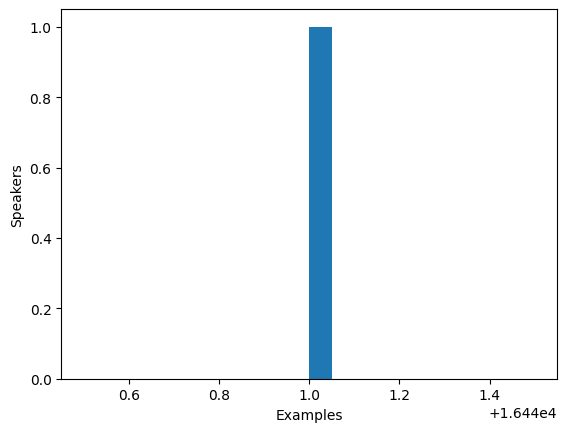

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(speaker_counts.values(), bins=20)
plt.ylabel("Speakers")
plt.xlabel("Examples")
plt.show()

Around one-third of speakers has fewer than 100 examples. Approximately ten or so speakers have more than 500 examples. To speed up training, let's limit ourselves to speakers that have between 100 and 400 examples. This also makes the dataset more balanced.

In [ ]:
def select_speaker(speaker_id):
    return 100 <= speaker_counts[speaker_id]

dataset1 = dataset1.filter(select_speaker, input_columns=["speaker_id"])

Filter:   0%|          | 0/16441 [00:00<?, ? examples/s]

How many speakers remain?

In [ ]:
len(set(dataset1["speaker_id"]))

1

And how many examples?

In [ ]:
len(dataset1)

16441

Just under 10k examples and ~40 unique speakers, which should be plenty.

Note: Even better would be to include the lengths of the examples. It's quite possible that speakers with few examples have plenty of audio available if these examples are relatively long. But it takes a while to scan through the entire dataset to find this information (since that requires loading and decoding each audio file), which is why we're skipping it here.

## Speaker embeddings

To allow the TTS model to distinguish between multiple speakers, we'll need to create a speaker embedding for each example. The speaker embedding is simply an additional input into the model that captures a particular speaker's voice characteristics.

To create the speaker embeddings, we use the [spkrec-xvect-voxceleb](https://huggingface.co/speechbrain/spkrec-xvect-voxceleb) model from SpeechBrain. The following defines a function `create_speaker_embedding()` that takes an input audio waveform and outputs a 512-element vector containing the corresponding speaker embedding.

In [ ]:
import os
import torch
from speechbrain.pretrained import EncoderClassifier

spk_model_name = "speechbrain/spkrec-xvect-voxceleb"

device = "cuda" if torch.cuda.is_available() else "cpu"
speaker_model = EncoderClassifier.from_hparams(
    source=spk_model_name,
    run_opts={"device": device},
    savedir=os.path.join("/tmp", spk_model_name)
)

def create_speaker_embedding(waveform):
    with torch.no_grad():
        speaker_embeddings = speaker_model.encode_batch(torch.tensor(waveform))
        speaker_embeddings = torch.nn.functional.normalize(speaker_embeddings, dim=2)
        speaker_embeddings = speaker_embeddings.squeeze().cpu().numpy()
    return speaker_embeddings

torchvision is not available - cannot save figures


Note: the `speechbrain/spkrec-xvect-voxceleb` model was trained on English speech from the VoxCeleb dataset, while our training examples are in Dutch. We're assuming here that this model will still make reasonable speaker embeddings, but this may not be true. First training an X-vector model on the target speech, such as Dutch, might work better.

## Preparing the dataset

The `prepare_dataset` function takes in a single example and uses the `SpeechT5Processor` object to tokenize the input text and load the target audio into a log-mel spectrogram. It also adds the speaker embeddings as an additional input.

In [ ]:
def prepare_dataset(example):
    # load the audio data; if necessary, this resamples the audio to 16kHz
    audio = example["audio"]

    # feature extraction and tokenization
    example = processor(
        text=example["normalized_text"],
        audio_target=audio["array"],
        sampling_rate=audio["sampling_rate"],
        return_attention_mask=False,
    )

    # strip off the batch dimension
    example["labels"] = example["labels"][0]

    # use SpeechBrain to obtain x-vector
    example["speaker_embeddings"] = create_speaker_embedding(audio["array"])

    return example

Let's verify the processing is correct by looking at a single example:

In [ ]:
processed_example = prepare_dataset(dataset1[0])

This should give us:

- the tokens for the input text in `input_ids`
- the speaker embedding in `speaker_embeddings`
- the target spectrogram in `labels`

In [ ]:
list(processed_example.keys())

['input_ids', 'labels', 'speaker_embeddings']

In [ ]:
dataset1[0]['normalized_text']

'hi, kirthika nanthakumar'

In [ ]:
dataset1[0]['audio']

{'path': './kareena_filtered/kirthika-nanthakumar.wav',
 'array': array([0., 0., 0., ..., 0., 0., 0.]),
 'sampling_rate': 16000}

The tokens should decode into the original text, with `</s>` to mark the end of the sentence.

In [ ]:
tokenizer.decode(processed_example["input_ids"])

'hi, kirthika nanthakumar</s>'

Speaker embeddings should be a 512-element vector:

In [ ]:
processed_example["speaker_embeddings"].shape

(512,)

The labels should be a log-mel spectrogram with 80 mel bins.

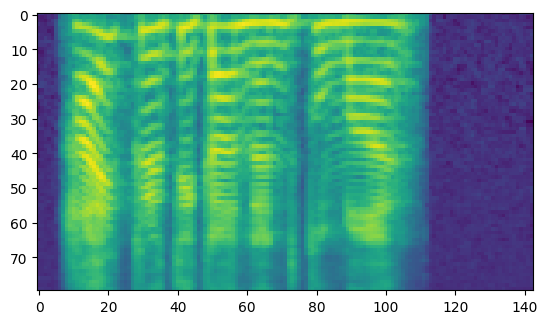

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(processed_example["labels"].T)
plt.show()

If we run a vocoder on the log-mel spectrogram, it should produce the original audio again. We'll load the HiFi-GAN vocoder from the original [SpeechT5 checkpoint](https://hf.co/microsoft/speecht5_hifigan).

In [ ]:
from transformers import SpeechT5HifiGan
vocoder = SpeechT5HifiGan.from_pretrained("microsoft/speecht5_hifigan")

In [ ]:
spectrogram = torch.tensor(processed_example["labels"])
with torch.no_grad():
    speech = vocoder(spectrogram)

In [ ]:
from IPython.display import Audio
Audio(speech.cpu().numpy(), rate=16000)

That all looks and sounds good! We can now process the entire dataset. This will take between 5 and 10 minutes.

In [ ]:
dataset1 = dataset1.map(
    prepare_dataset, remove_columns=dataset1.column_names,
)

Map:   0%|          | 0/16441 [00:00<?, ? examples/s]

Some of the examples in the dataset are apparently longer than the maximum input length the model can handle (600 tokens), so we should remove those from the dataset. In fact, to allow for larger batch sizes we'll remove anything over 200 tokens.

In [ ]:
def is_not_too_long(input_ids):
    input_length = len(input_ids)
    return input_length < 200

dataset1 = dataset1.filter(is_not_too_long, input_columns=["input_ids"])

Filter:   0%|          | 0/16441 [00:00<?, ? examples/s]

How many examples are left?

In [ ]:
len(dataset1)

16441

## Train/test split

Create a basic train/test split. For our purposes, it's OK if the same speaker is part of both sets.

In [ ]:
dataset1 = dataset1.train_test_split(test_size=0.1)

What does the dataset look like now?

In [ ]:
dataset1

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'labels', 'speaker_embeddings'],
        num_rows: 14796
    })
    test: Dataset({
        features: ['input_ids', 'labels', 'speaker_embeddings'],
        num_rows: 1645
    })
})

In [ ]:
dataset1["train"][0]

{'input_ids': [4,
  11,
  10,
  23,
  4,
  13,
  8,
  57,
  18,
  10,
  9,
  7,
  4,
  12,
  11,
  7,
  10,
  28,
  46,
  2],
 'labels': [[-4.803127765655518,
   -4.927536964416504,
   -5.126454830169678,
   -5.336782932281494,
   -5.418011665344238,
   -5.0646491050720215,
   -5.055876731872559,
   -4.9447021484375,
   -4.8445868492126465,
   -5.238633632659912,
   -4.874849319458008,
   -5.06483793258667,
   -4.596749305725098,
   -4.710278511047363,
   -4.490497589111328,
   -4.685433864593506,
   -5.110342979431152,
   -4.954958438873291,
   -4.949832439422607,
   -5.06293249130249,
   -5.061095237731934,
   -4.936027526855469,
   -4.824577331542969,
   -5.1794538497924805,
   -5.378562927246094,
   -5.186435699462891,
   -5.274848461151123,
   -4.864722728729248,
   -4.854996204376221,
   -5.031378746032715,
   -4.933509349822998,
   -4.9209747314453125,
   -4.865777969360352,
   -4.862917900085449,
   -5.309785842895508,
   -5.437524318695068,
   -5.009312629699707,
   -4.9098091

## Collator to make batches

We need to define a custom collator to combine multiple examples into a batch. This will pad shorter sequences with padding tokens. For the spectrogram labels, the padded portions are replaced with the special value -100. This special value tells the model to ignore that part of the spectrogram when calculating the spectrogram loss.


In [ ]:
from dataclasses import dataclass
from typing import Any, Dict, List, Union

@dataclass
class TTSDataCollatorWithPadding:
    processor: Any

    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:

        input_ids = [{"input_ids": feature["input_ids"]} for feature in features]
        label_features = [{"input_values": feature["labels"]} for feature in features]
        speaker_features = [feature["speaker_embeddings"] for feature in features]

        # collate the inputs and targets into a batch
        batch = processor.pad(
            input_ids=input_ids,
            labels=label_features,
            return_tensors="pt",
        )

        # replace padding with -100 to ignore loss correctly
        batch["labels"] = batch["labels"].masked_fill(
            batch.decoder_attention_mask.unsqueeze(-1).ne(1), -100
        )

        # not used during fine-tuning
        del batch["decoder_attention_mask"]

        # round down target lengths to multiple of reduction factor
        if model.config.reduction_factor > 1:
            target_lengths = torch.tensor([
                len(feature["input_values"]) for feature in label_features
            ])
            target_lengths = target_lengths.new([
                length - length % model.config.reduction_factor for length in target_lengths
            ])
            max_length = max(target_lengths)
            batch["labels"] = batch["labels"][:, :max_length]

        # also add in the speaker embeddings
        batch["speaker_embeddings"] = torch.tensor(speaker_features)

        return batch

In SpeechT5, the input to the decoder part of the model is reduced by a factor 2. In other words, it throws away every other timestep from the target sequence. The decoder then predicts a sequence that is twice as long. Since the original target sequence length may be odd, the data collator makes sure to round the maximum length of the batch down to be a multiple of 2.

In [ ]:
data_collator = TTSDataCollatorWithPadding(processor=processor)

Let's test the data collator.

In [ ]:
features = [
    dataset1["train"][0],
    dataset1["train"][1],
    dataset1["train"][20],
]

batch = data_collator(features)

In [ ]:
{k:v.shape for k,v in batch.items()}

{'input_ids': torch.Size([3, 20]),
 'attention_mask': torch.Size([3, 20]),
 'labels': torch.Size([3, 110, 80]),
 'speaker_embeddings': torch.Size([3, 512])}

In [ ]:
import numpy as np

Looks good!

## Training

It's always a good idea to upload model checkpoints directly to the [Hugging Face Hub](https://huggingface.co/) while training. To allow this, first log in to the Hub by entering your Hub authentication token:

The `use_cache=True` option is incompatible with gradient checkpointing. Disable it for training, otherwise it keeps complaining about it.

In [ ]:

model.config.use_cache = False

Define the training arguments.

We won't be computing any evaluation metrics during the training process. Instead, we'll only look at the loss. The lower the loss, the better the model.

Note: If you do not want to upload the model checkpoints to the Hub, set `push_to_hub=False`.

In [ ]:
from transformers import Seq2SeqTrainingArguments

training_args = Seq2SeqTrainingArguments(
    output_dir="./checkpoints",     # change to a repo name of your choice
    auto_find_batch_size = False ,
    per_device_train_batch_size=2,
    gradient_accumulation_steps=2,
    learning_rate=1e-4,
    warmup_steps=500,
    max_steps=30000,
    gradient_checkpointing=True,
    fp16=True,
    evaluation_strategy="steps",
    per_device_eval_batch_size=4,
    save_steps=1000,
    eval_steps=1000,
    logging_steps=25,
    #report_to=["tensorboard"],
    load_best_model_at_end=True,
    greater_is_better=False,
    label_names=["labels"],
    #push_to_hub=True,
)

Create the trainer object using the model, dataset, and data collator.

In [ ]:
from transformers import Seq2SeqTrainer

trainer = Seq2SeqTrainer(
    args=training_args,
    model=model,
    train_dataset=dataset1["train"],
    eval_dataset=dataset1["test"],
    data_collator=data_collator,
    tokenizer=processor.tokenizer,
)

And with that, we're ready to start training!

Training will take several hours depending on your GPU or the one allocated to the Google Colab. Depending on your GPU, it is possible that you will encounter a CUDA "out-of-memory" error when you start training. In this case, you can reduce the `per_device_train_batch_size` incrementally by factors of 2 and increase `gradient_accumulation_steps` by 2x to compensate.

In [ ]:
trainer.train()

/root/miniconda3/envs/tts/lib/python3.9/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss
1000,0.516700,0.469474
2000,0.521100,0.440654
3000,0.482900,0.448762
4000,0.458700,0.431671
5000,0.435900,0.408881
6000,0.455000,0.416171
7000,0.428400,0.412858
8000,0.427800,0.399520
9000,0.411600,0.395977
10000,0.410500,0.386496


TrainOutput(global_step=30000, training_loss=0.4036881135304769, metrics={'train_runtime': 10305.7831, 'train_samples_per_second': 11.644, 'train_steps_per_second': 2.911, 'total_flos': 1767417190567776.0, 'train_loss': 0.4036881135304769, 'epoch': 8.11})

The training results can now be uploaded to the Hub. To do so, execute the `push_to_hub` command:

You can now share this model with anyone using the link on the Hub.

Inference

After training finishes, let's use the model to synthesize some speech!

I'm loading the model from the Hugging Face Hub, as the Colab notebook was terminated before training finished (which is why it's a good idea to use `push_to_hub=True` when training).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from transformers import SpeechT5Processor, SpeechT5ForTextToSpeech
import numpy as np

In [ ]:
from transformers import SpeechT5Processor, SpeechT5ForTextToSpeech

processor = SpeechT5Processor.from_pretrained("microsoft/speecht5_tts")

In [ ]:
from transformers import SpeechT5HifiGan
vocoder = SpeechT5HifiGan.from_pretrained("microsoft/speecht5_hifigan")

In [ ]:
model1 = SpeechT5ForTextToSpeech.from_pretrained("/content/drive/MyDrive/tts/30k/checkpoint-29000")

In [ ]:
speaker_embeddings1 = np.load("/content/drive/MyDrive/tts/20k/speaker_embeddings_kk.npy")

First we need to obtain a speaker embedding. We can simply grab one from the test set.

In [ ]:
speaker_embeddings1.shape

(1, 512)

In [ ]:
example = dataset1['test'][150]
speaker_embeddings = torch.tensor(example["speaker_embeddings"]).unsqueeze(0)
speaker_embeddings.shape

In [ ]:
tokenizer = processor.tokenizer

Define some input text and tokenize it.

In [ ]:
import torch

# Convert speaker_embeddings to a PyTorch tensor
speaker_embeddings_tensor = torch.from_numpy(speaker_embeddings1)

# Normalize the speaker_embeddings_tensor
normalized_speaker_embeddings = torch.nn.functional.normalize(speaker_embeddings_tensor)


In [ ]:
text = "hi, aetihaasik"

In [ ]:

tokenizer.decode(tokenizer(text)["input_ids"])

'hi, aetihaasik</s>'

In [ ]:
inputs = processor(text=text, return_tensors="pt")

In [ ]:
print(inputs)

{'input_ids': tensor([[ 4, 11, 10, 23,  4,  7,  5,  6, 10, 11,  7,  7, 12, 10, 28,  2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}


Tell the model to generate a spectrogram from the input text.

In [ ]:
spectrogram = model1.generate_speech(inputs["input_ids"], normalized_speaker_embeddings)

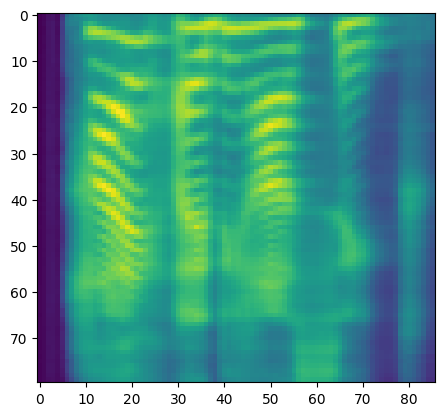

In [ ]:

import matplotlib.pyplot as plt

plt.figure()
plt.imshow(spectrogram.T)
plt.show()

Finally, use the vocoder to turn the spectrogram into sound.

In [ ]:
with torch.no_grad():
    speech = vocoder(spectrogram)

In [ ]:

from IPython.display import Audio
Audio(speech.numpy(), rate=16000)

In [ ]:
import soundfile as sf
sf.write("aetihaasik.wav", speech.numpy(), samplerate=16000)

 Thank you